In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install gradio joblib nltk

In [3]:
import nltk

# ✅ This downloads all essential NLTK tokenizer resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Ensure required NLTK data is available in any environment (Colab, Codespaces, local)
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')  # required for WordNetLemmatizer


In [4]:
import nltk
nltk.download('punkt')

import nltk.data
print(nltk.data.find('tokenizers/punkt/english.pickle'))


/root/nltk_data/tokenizers/punkt/english.pickle


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
import re
import nltk
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import gradio as gr
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score ,classification_report

In [6]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# Load the dataset
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Tweets.csv')  # Ensure the CSV is in the correct location
lemmatizer = nltk.WordNetLemmatizer()
stop_words = set(nltk.corpus.stopwords.words('english'))

In [8]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [10]:
# Preprocess the text data
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    from nltk.tokenize import word_tokenize
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

df['processed_text'] = df['text'].apply(preprocess_text)
X = df['processed_text']
y = df['airline_sentiment'].map({'negative': 0, 'neutral': 1, 'positive': 2})

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

,processed_text
750,united offering u 8 room 32 people
6875,jetblue jfk nyc staff amazing jetblue sending ...
7598,jetblue well last update right direction least...
14124,americanair flight 3056 still sitting dfw wait...
6187,southwestair companion pas broken today purcha...
...,...
5191,southwestair replacing vitaminwater beer bravo...
13418,americanair lax service rep hand 800 number ca...
5390,southwestair hold hour chance someone help
860,united wouldhow contact discus poor experience...


In [ ]:
y_train

,airline_sentiment
750,0
6875,0
7598,2
14124,0
6187,1
...,...
5191,2
13418,0
5390,0
860,0


In [ ]:
X_test

,processed_text
4794,southwestair youre early frontrunner best airline
10480,usairways flt ewr cancelled flightled yet flts...
8067,jetblue going bdl dca flight yesterday today e...
8880,jetblue depart washington dc
8292,jetblue probably find ticket
...,...
11765,usairways hold 2 hour know keep money
14156,americanair hard catering ready go
10963,usairways americanair im 6k needed suggestion
4877,southwestair well need something aim


In [ ]:
y_test

,airline_sentiment
4794,2
10480,0
8067,0
8880,1
8292,0
...,...
11765,0
14156,0
10963,1
4877,1


In [ ]:
# Vectorize the text data
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [ ]:
# Train models and evaluate them
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(kernel='linear')
}

model_accuracies = {}
classification_reports = {}

for model_name, model in models.items():
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[model_name] = accuracy
    classification_reports[model_name] = classification_report(y_test, y_pred)
    print(f"{model_name} accuracy: {accuracy:.2f}")

Logistic Regression accuracy: 0.80
Naive Bayes accuracy: 0.74
Random Forest accuracy: 0.77
Support Vector Machine accuracy: 0.79


In [ ]:
# Display classification reports for further analysis
for model_name, report in classification_reports.items():
    print(f"\nClassification Report for {model_name}:\n")
    print(report)


Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      1889
           1       0.67      0.49      0.56       580
           2       0.80      0.62      0.70       459

    accuracy                           0.80      2928
   macro avg       0.77      0.68      0.71      2928
weighted avg       0.79      0.80      0.79      2928


Classification Report for Naive Bayes:

              precision    recall  f1-score   support

           0       0.72      0.99      0.84      1889
           1       0.72      0.23      0.34       580
           2       0.91      0.34      0.50       459

    accuracy                           0.74      2928
   macro avg       0.79      0.52      0.56      2928
weighted avg       0.75      0.74      0.69      2928


Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.80      0.94      0.86      1

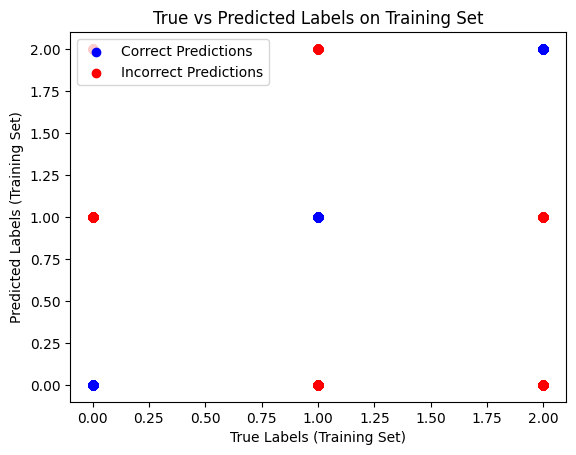

In [ ]:

# Now plot the predictions against true labels for the training set
# Scatter plot is more appropriate for comparing two sets of discrete values
plt.scatter(y_train[y_train_pred == y_train], y_train_pred[y_train_pred == y_train], c='b', label='Correct Predictions')
plt.scatter(y_train[y_train_pred != y_train], y_train_pred[y_train_pred != y_train], c='r', label='Incorrect Predictions')
plt.xlabel("True Labels (Training Set)")
plt.ylabel("Predicted Labels (Training Set)")
plt.title("True vs Predicted Labels on Training Set")
plt.legend(loc='best') # Add a legend to differentiate correct and incorrect predictions
plt.show()

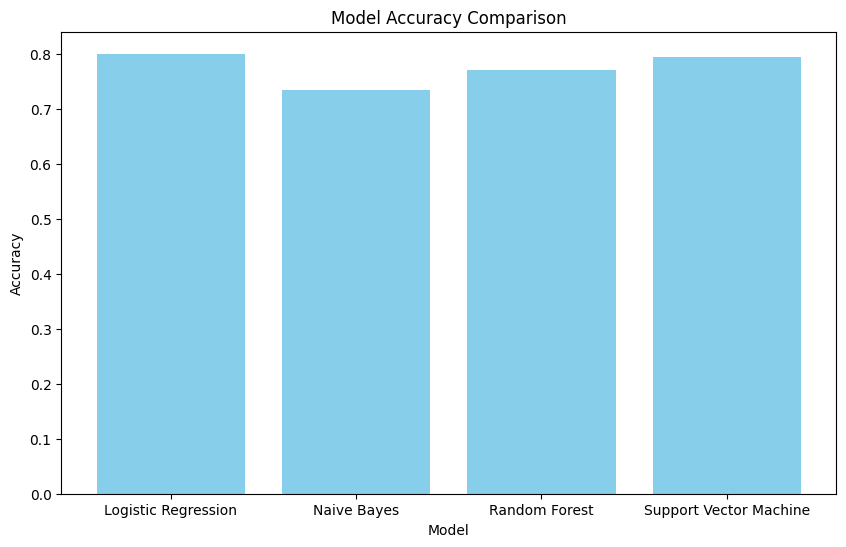

In [ ]:
# Plot the model accuracy comparison
plt.figure(figsize=(10, 6))
plt.bar(model_accuracies.keys(), model_accuracies.values(), color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()

In [ ]:
# Select the best model based on accuracy
best_model_name = max(model_accuracies, key=model_accuracies.get)
best_model = models[best_model_name]

In [ ]:
# Save the best model and vectorizer
joblib.dump(best_model, 'best_sentiment_model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')

['vectorizer.pkl']

In [ ]:

# Load the saved model and vectorizer (for the Gradio interface)
best_model = joblib.load('best_sentiment_model.pkl')
vectorizer = joblib.load('vectorizer.pkl')

In [ ]:
# Function to perform sentiment analysis
def perform_sentiment_analysis(comment):
    processed_comment = preprocess_text(comment)
    comment_vec = vectorizer.transform([processed_comment])
    prediction = best_model.predict(comment_vec)[0]
    sentiment = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}.get(prediction, 'Unknown')
    return sentiment

In [ ]:
from gradio.components import Textbox

In [ ]:
# Create a Gradio interface with enhanced UI
def predict_sentiment(comment):
    sentiment = perform_sentiment_analysis(comment)
    return f"The sentiment is: {sentiment}"

interface = gr.Interface(
    fn=predict_sentiment,
    inputs=gr.Textbox(lines=4, placeholder="Enter a comment here..."),
    outputs="text",
    title="Enhanced Sentiment Analysis",
    description="This tool analyzes the sentiment of a given text (Negative, Neutral, or Positive) using the best performing machine learning model.",
    theme=gr.themes.Soft(),  # Use a dark theme for better visual appeal
    examples=[["I love flying with this airline!"], ["The service was terrible and I will not fly with them again."], ["The flight was okay, nothing special."]],
)

/usr/local/lib/python3.10/dist-packages/gradio/blocks.py:978: UserWarning: Cannot load dark. Caught Exception: 404 Client Error: Not Found for url: https://huggingface.co/api/spaces/dark (Request ID: Root=1-66bdaf65-72cb01f9477b780953a5034c;82a41028-779a-447c-a094-ae4d641ba045)

Sorry, we can't find the page you are looking for.
  warnings.warn(f"Cannot load {theme}. Caught Exception: {str(e)}")


In [ ]:
# Launch the Gradio interface
interface.launch(share=True)

Rerunning server... use `close()` to stop if you need to change `launch()` parameters.
----
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://328341820602ca7169.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
